**Imports**

Nous effectuons les imports nécessaires.

In [25]:
import matplotlib.pyplot as plt
from tqdm import tqdm
import pandas as pd
import numpy as np
import torch
import time

from libtransmul import compute_transmul_cpp, compute_transmul_cython

torch.manual_seed(42)

**General functions**

Nous commençons par écrire quelques fonctions qui pourront nous être utiles dans le code après.

In [26]:
#Generating random function
def generate_random_matrix(size):
    return np.random.rand(size, size)

In [27]:
#Measuring time of a function
def measure_time(func, *args):
    start_time = time.time()
    result = func(*args)
    end_time = time.time()
    return end_time - start_time, result

In [28]:
#Converting numpy to float (matrix)
def numpy_to_FloatMatrix(np_array):
    return [[float(x) for x in row] for row in np_array]

In [29]:
#the function (A.B)T in Numpy
def numpy_function(A, B):
    result = np.dot(A, B)
    result_transposed = np.transpose(result)
    return result_transposed

In [30]:
#the same function using PyTorch
def pytorch_function(A, B):
    result = torch.matmul(A, B)
    result_transposed = torch.transpose(result, 0, 1)
    return result_transposed

In [31]:
import tensorflow as tf

#the same function using TensorFlow
def tensorflow_function(A, B):
    result = tf.matmul(A, B)
    result_transposed = tf.transpose(result)
    return result_transposed

**Testing the functions**

In [32]:
A = np.array([[1.0, 2.0], [3.0, 4.0]], dtype=np.float32)
B = np.array([[5.0, 6.0], [7.0, 8.0]], dtype=np.float32)

A_list = numpy_to_FloatMatrix(A)
B_list = numpy_to_FloatMatrix(B)

In [33]:
numpy_function(A, B)

array([[19., 43.],
       [22., 50.]], dtype=float32)

In [34]:
# Testing compute_transmul_cpp
result_cpp = compute_transmul_cpp(A_list, B_list)
print("Result from C++ function wrapped by Cython:")
print(np.array(result_cpp))

Result from C++ function wrapped by Cython:
[[19. 43.]
 [22. 50.]]


In [35]:
# Testing compute_transmul_cython
result_cython = compute_transmul_cython(A, B)
print("Result from Cython function:")
print(np.array(result_cython))

Result from Cython function:
[[19. 43.]
 [22. 50.]]


Les fonctions retournent le même résultat. Donc tout semble fonctionner.

**First comparisons with numpy**

In [36]:
sizes = [100, 200, 500, 1000]
cpp_times_mult = []
numpy_times_mult = []
cython_times_mult = []

In [39]:
dims = [2**i for i in range(15)]


cpp_times = []
cython_times = []
numpy_times = []

for dim in dims:
    # Generate random matrices of the specified dimension
    A = np.random.rand(dim, dim).astype(np.float32)
    B = np.random.rand(dim, dim).astype(np.float32)
    A_list = numpy_to_FloatMatrix(A)
    B_list = numpy_to_FloatMatrix(B)

    # Measure time for C++ function wrapped by Cython
    start_time = time.time()
    result_cpp = compute_transmul_cpp(A_list, B_list)
    end_time = time.time()
    cpp_times.append(end_time - start_time)

    # Measure time for Cython function
    start_time = time.time()
    result_cython = compute_transmul_cython(A, B)
    end_time = time.time()
    cython_times.append(end_time - start_time)

    # Measure time for NumPy function
    start_time = time.time()
    result_numpy = numpy_function(A, B)
    end_time = time.time()
    numpy_times.append(end_time - start_time)

KeyboardInterrupt: 

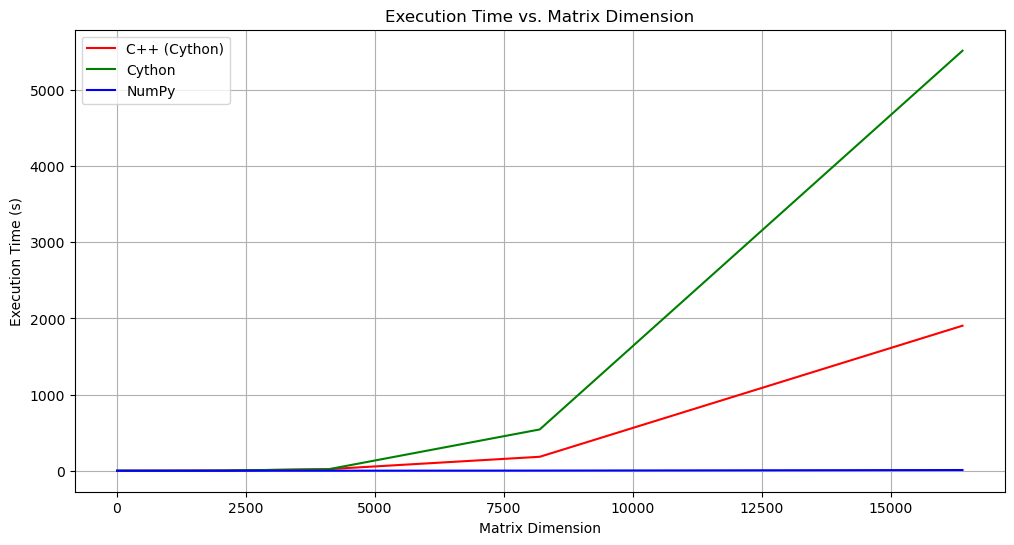

In [15]:
plt.figure(figsize=(12, 6))
plt.plot(dims, cpp_times, label='C++ (Cython)', color='r')
plt.plot(dims, cython_times, label='Cython', color='g')
plt.plot(dims, numpy_times, label='NumPy', color='b')
plt.xlabel('Matrix Dimension')
plt.ylabel('Execution Time (s)')
plt.title('Execution Time vs. Matrix Dimension')
plt.legend()
plt.grid(True)
plt.show()

In [40]:
dims = [2**i for i in range(12)]


cpp_times = []
cython_times = []
numpy_times = []

for dim in dims:
    # Generate random matrices of the specified dimension
    A = np.random.rand(dim, dim).astype(np.float32)
    B = np.random.rand(dim, dim).astype(np.float32)
    A_list = numpy_to_FloatMatrix(A)
    B_list = numpy_to_FloatMatrix(B)

    # Measure time for C++ function wrapped by Cython
    start_time = time.time()
    result_cpp = compute_transmul_cpp(A_list, B_list)
    end_time = time.time()
    cpp_times.append(end_time - start_time)

    # Measure time for Cython function
    start_time = time.time()
    result_cython = compute_transmul_cython(A, B)
    end_time = time.time()
    cython_times.append(end_time - start_time)

    # Measure time for NumPy function
    start_time = time.time()
    result_numpy = numpy_function(A, B)
    end_time = time.time()
    numpy_times.append(end_time - start_time)

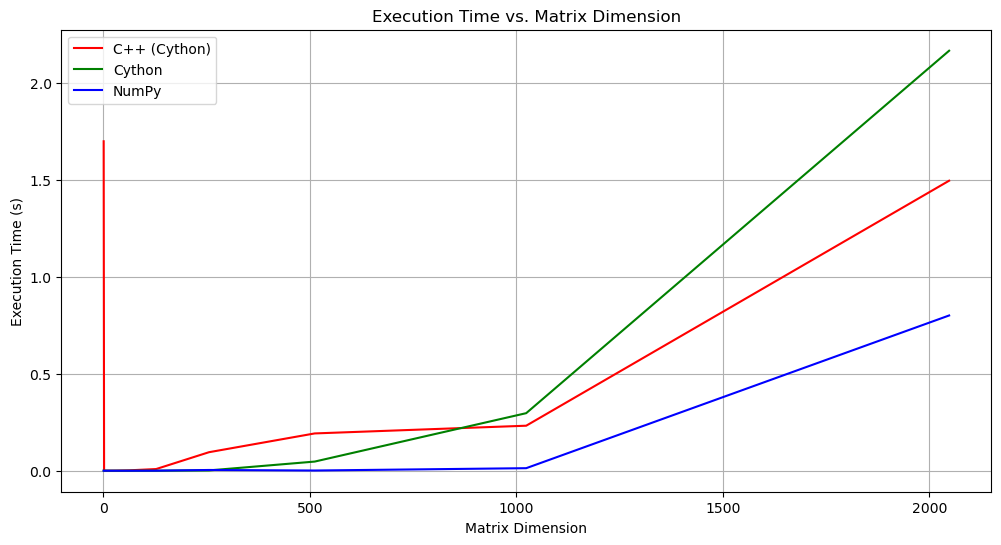

In [41]:
plt.figure(figsize=(12, 6))
plt.plot(dims, cpp_times, label='C++ (Cython)', color='r')
plt.plot(dims, cython_times, label='Cython', color='g')
plt.plot(dims, numpy_times, label='NumPy', color='b')
plt.xlabel('Matrix Dimension')
plt.ylabel('Execution Time (s)')
plt.title('Execution Time vs. Matrix Dimension')
plt.legend()
plt.grid(True)
plt.show()

**Comparing with PyTorch**

In [42]:
cpp_times = []
cython_times = []
numpy_times = []
pytorch_times = []
tensorflow_times = []

dims = [2**i for i in range(12)]

for dim in dims:
    # Generate random matrices of the specified dimension
    A = np.random.rand(dim, dim).astype(np.float32)
    B = np.random.rand(dim, dim).astype(np.float32)
    
    # Measure time for C++ function wrapped by Cython
    start_time = time.time()
    result_cpp = compute_transmul_cpp(A_list, B_list)  
    end_time = time.time()
    cpp_times.append(end_time - start_time)

    # Measure time for Cython function
    start_time = time.time()
    result_cython = compute_transmul_cython(A, B)  
    end_time = time.time()
    cython_times.append(end_time - start_time)

    # Measure time for NumPy function
    start_time = time.time()
    result_numpy = numpy_function(A, B) 
    end_time = time.time()
    numpy_times.append(end_time - start_time)

    # Measure time for PyTorch function
    start_time = time.time()
    result_pytorch = pytorch_function(torch.tensor(A), torch.tensor(B))  # Converting numpy arrays to PyTorch tensors
    end_time = time.time()
    pytorch_times.append(end_time - start_time)

    # Measure time for TensorFlow function
    start_time = time.time()
    result_tensorflow = tensorflow_function(tf.convert_to_tensor(A), tf.convert_to_tensor(B))  # Converting numpy arrays to TensorFlow tensors
    end_time = time.time()
    tensorflow_times.append(end_time - start_time)


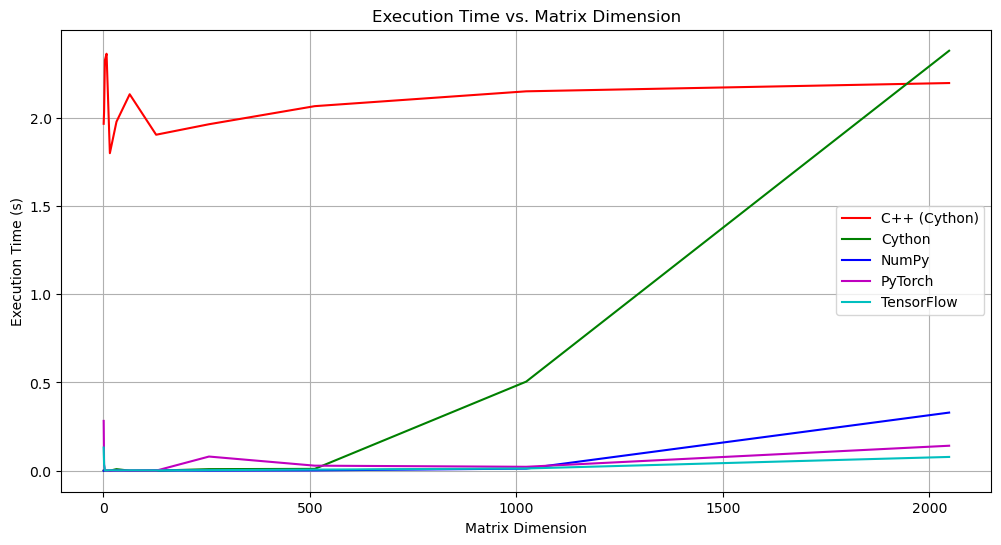

In [24]:
plt.figure(figsize=(12, 6))
plt.plot(dims, cpp_times, label='C++ (Cython)', color='r')
plt.plot(dims, cython_times, label='Cython', color='g')
plt.plot(dims, numpy_times, label='NumPy', color='b')
plt.plot(dims, pytorch_times, label='PyTorch', color='m')  
plt.plot(dims, tensorflow_times, label='TensorFlow', color='c')  
plt.xlabel('Matrix Dimension')
plt.ylabel('Execution Time (s)')
plt.title('Execution Time vs. Matrix Dimension')
plt.legend()
plt.grid(True)
plt.show()